In [1]:
import seaborn as sns
import pandas as pd
from pract2_utils import *
from sklearn.cluster import KMeans, Birch
import matplotlib.pyplot as plt
from collections import Counter


def obtenerResultadosKmeans(cluster, data_norm):
    results = KMeans(n_clusters=cluster, random_state=0).fit(data_norm)
    labels = results.labels_
    centroides_kmeans = results.cluster_centers_
    silhouette, calinski = measures_silhoutte_calinski(data_norm, labels)
    print("silhouette: {:3f}".format(silhouette))
    print("calinsky: {:3f}".format(calinski))
    print('Tamaño clusters', Counter(labels))
    return centroides_kmeans
    
def obtenerResultadosBirch(cluster, thres, data_norm):
    df_data = pd.DataFrame(data_norm)
    results = Birch(n_clusters=cluster,threshold=thres).fit(data_norm)
    labels = results.labels_
    df_data.columns = atributos
    df_data['cluster'] = labels
    df_centroides = df_data.groupby('cluster').mean()
    centroides_birch = df_centroides.values

    silhouette, calinski = measures_silhoutte_calinski(data_norm, labels)

    print("silhouette: {:3f}".format(silhouette))
    print("calinsky: {:3f}".format(calinski))
    print('Tamaño clusters', Counter(labels))
    return centroides_birch

def ElbowMethod(X_normal):
    wcss = []
    for i in range(3, 20):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(X_normal)
        wcss.append(kmeans.inertia_)
    plt.plot(range(3, 20), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Número de clusters')
    plt.ylabel('WCSS')
    print("")


In [2]:
accidentes = pd.read_csv('accidentes_2013.csv')

dfSol = accidentes[(accidentes.FACTORES_ATMOSFERICOS == 'BUEN TIEMPO')&
                       ((accidentes.TIPO_VIA == 'VÍA CONVENCIONAL')
                        |(accidentes.TIPO_VIA == 'VÍA CONVENCIONAL CON CARRIL LENTO'))]

dfLluvia = accidentes[((accidentes.TIPO_VIA == 'VÍA CONVENCIONAL')
                    |(accidentes.TIPO_VIA == 'VÍA CONVENCIONAL CON CARRIL LENTO'))&
                      ((accidentes.FACTORES_ATMOSFERICOS == 'LLOVIZNANDO')|
                       (accidentes.FACTORES_ATMOSFERICOS == 'LLUVIA FUERTE'))]

atributos = ['TOT_VICTIMAS','TOT_MUERTOS','TOT_HERIDOS_GRAVES', 'TOT_HERIDOS_LEVES', 'TOT_VEHICULOS_IMPLICADOS']

#Datos en forma matricial
dataSol = to_matrix(dfSol, atributos)
dataLluvia = to_matrix(dfLluvia, atributos)

#Datos Normalizados
data_normSol = norm(dataSol)
data_normLluvia = norm(dataLluvia)

print("Soleado", len(dfSol))
print("Lluvioso", len(dfLluvia))

Soleado 23087
Lluvioso 3454


In [5]:
clusterKmeans = 16
clusterBirch = 16
thresBirch = 0.1

In [6]:
ElbowMethod(data_normSol)
sns.set(rc={'figure.figsize':(10,40)})
plt.savefig('./ElbowMethodKmeans.png')

In [7]:
sns.set(rc={'figure.figsize':(10,8)})
ElbowMethod(data_normLluvia)
plt.savefig('./ElbowMethodKmeans.png')

In [8]:
centroides_kmeansSol = obtenerResultadosKmeans(clusterKmeans, data_normSol)

silhouette: 0.873174
calinsky: 15572.650194
Tamaño clusters Counter({1: 6721, 2: 6254, 8: 2166, 7: 1537, 12: 1105, 3: 1101, 0: 1036, 5: 746, 14: 435, 15: 411, 10: 377, 11: 322, 4: 293, 6: 256, 9: 169, 13: 158})


In [9]:
centroides_kmeansLluvia = obtenerResultadosKmeans(clusterKmeans, data_normLluvia)

silhouette: 0.895988
calinsky: 2725.164385
Tamaño clusters Counter({1: 1377, 0: 660, 12: 320, 10: 251, 5: 164, 4: 159, 9: 108, 6: 90, 7: 89, 2: 82, 14: 44, 13: 42, 8: 31, 3: 19, 11: 17, 15: 1})


In [10]:
centroides_birchSol = obtenerResultadosBirch(clusterBirch,thresBirch,data_normSol)

silhouette: 0.449887
calinsky: 1631.466699
Tamaño clusters Counter({10: 19133, 1: 1716, 14: 1681, 0: 293, 4: 94, 11: 48, 2: 48, 9: 25, 7: 18, 8: 13, 5: 6, 3: 5, 6: 4, 15: 1, 13: 1, 12: 1})


In [11]:
centroides_birchLluvia = obtenerResultadosBirch(clusterBirch,thresBirch,data_normLluvia)

silhouette: 0.601149
calinsky: 569.970172
Tamaño clusters Counter({3: 1915, 13: 1119, 12: 244, 5: 61, 6: 32, 8: 20, 1: 19, 4: 17, 2: 9, 14: 6, 0: 5, 7: 2, 10: 2, 11: 1, 9: 1, 15: 1})


In [12]:
#Para la representación de las gráficas

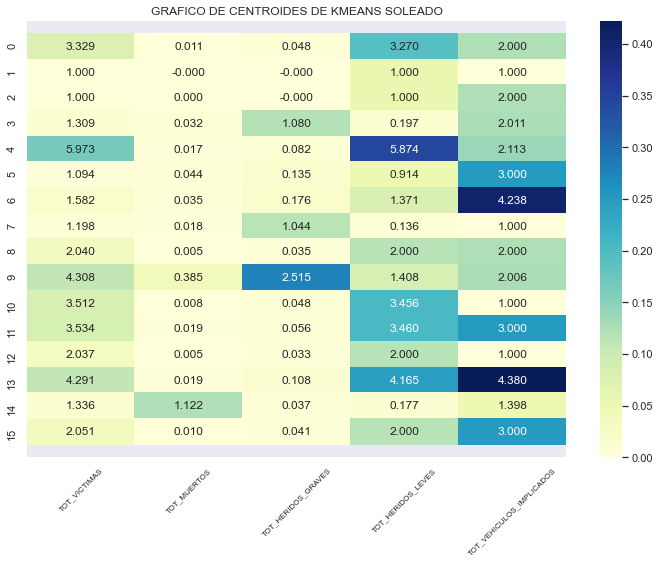

In [17]:
plt.title('GRAFICO DE CENTROIDES DE KMEANS SOLEADO')
sns.set(rc={'figure.figsize':(10,8)})

visualize_centroids(centroides_kmeansSol, dataSol, atributos)
plt.savefig('./imgcaso1/GraficoSolKmeans ' + str(clusterKmeans) +'.png')

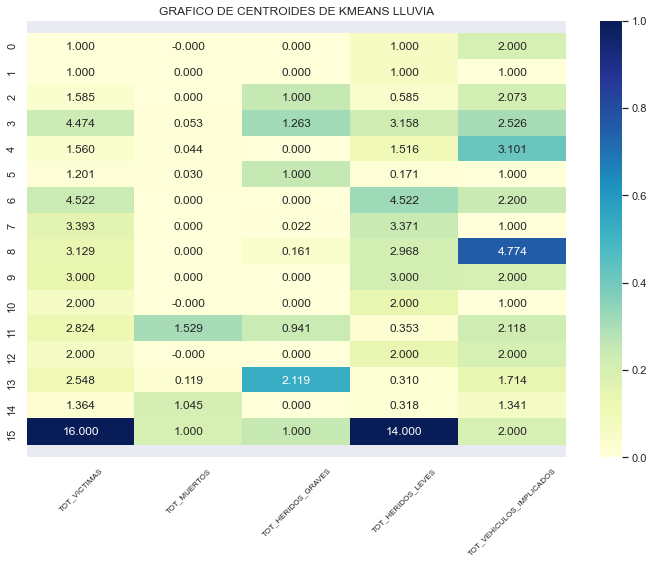

In [14]:
plt.title('GRAFICO DE CENTROIDES DE KMEANS LLUVIA')
sns.set(rc={'figure.figsize':(10,8)})

visualize_centroids(centroides_kmeansLluvia, dataLluvia, atributos)
plt.savefig('./imgcaso1/GraficoLluviaKmeans ' + str(clusterKmeans) +'.png')

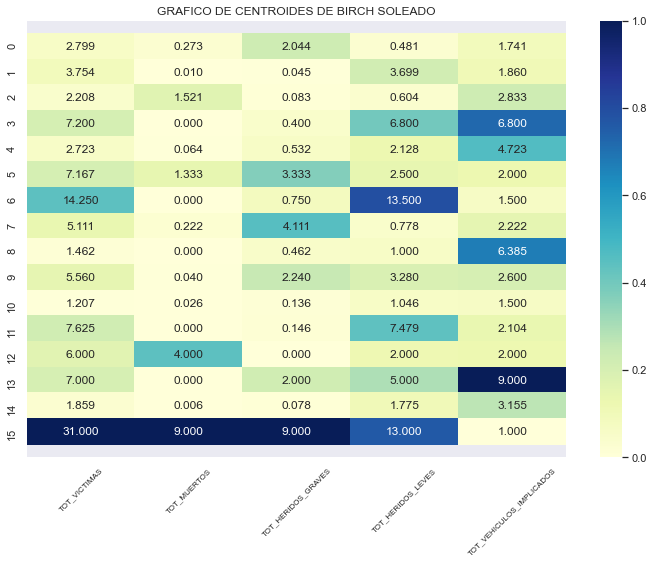

In [15]:
plt.title('GRAFICO DE CENTROIDES DE BIRCH SOLEADO')
sns.set(rc={'figure.figsize':(10,8)})

visualize_centroids(centroides_birchSol, dataSol, atributos)
plt.savefig('./imgcaso1/GraficoSolBirch ' + str(clusterBirch) +'.png')

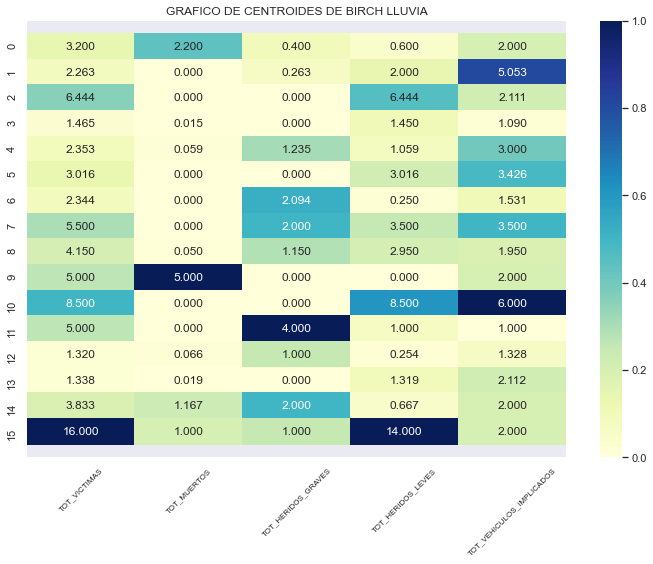

In [16]:
plt.title('GRAFICO DE CENTROIDES DE BIRCH LLUVIA')
sns.set(rc={'figure.figsize':(10,8)})

visualize_centroids(centroides_birchLluvia, dataLluvia, atributos)
plt.savefig('./imgcaso1/GraficoLluviaBirch ' + str(clusterBirch) +'.png')